# Homework 2 - Data Wrangling


*In this homework, you are going to work on a real-world dataset and perform some data transformations. We suggest you start the homework early.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw2`</font>.

2. Write your solutions in the cells  marked as <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs**. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed on the notebook.

4. When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


  a. Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.

  b. Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, please use the discussion page on Sucourse.

---

**Important Note: In this homework, you are not allowed to use Pandas.**

In this homework, you will work on a dataset from [Kaggle-Medium-2021-Data-Science-Articles](https://www.kaggle.com/datasets/viniciuslambert/medium-2021-data-science-articles-dataset). The dataset contains information on data science articles shared on Medium.com in 2021.

For this homework, you will use the provided file `Medium_DS_Articles_2021_Dataset.csv`. This is a modified version of the original dataset.
<!-- This is not the original data file, we modified and eliminated some parts. -->

In the dataset, each row has 7 attribute values separated with `,`. These attributes are described in the list below with their respective order in the dataset.


  1.   **url:** Refers to the url of the article

  2.   **author:** Who has written the article

  3.   **claps** Similar to "Likes" on Social Media

  4.   **responses:** Comments written to the articles
  
  5.   **reading_time:** Reading time of articles recorded by Medium.com (In minutes)
  
  6.   **date:** The date the article was written


A snapshot from the dataset containing three sample rows is also provided below.
```
['https://medium.com/@sellforte-insights/bayesian-data-analysis-a-brave-new-world-of-statistics-1fc3167812d7','sellforte-insights', '0.0', '0.0', '9-min', 'Data Science','2021-05-19']
['https://towardsdatascience.com/how-to-improve-deep-learning-forecasts-for-time-series-part-2-c11efc8dfee2','michaelberk', '106.0', '0.0', '5-min', 'Machine Learning','2021-10-26']
['https://medium.com/@paulshin17/intro-on-linear-regression-using-keras-predicting-real-estate-price-f0e94de1b912','paulshin17', '107.0', '0.0', '6-min', 'Data Science','2021-10-18']
...
```

*Do not forget to add the shared `Medium_DS_Articles_2021_Dataset.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*

**!!!IMPORTANT: You are not allowed to use `pandas` in this homework**

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re
import csv

%matplotlib inline

## 10 Points - Q1: Read the Dataset

In the provided dataset, entries are separated by commas. Read and store the file as a 2D numpy array. Each column should capture the corresponding fields.

- Read the given file into a numpy array.
- Print the number of rows and columns.
- Print the number of unique Tags.

Example Output:
```
Number of rows: 36810, columns: 7
Number of unique Tags: 8
```

*Hint: Do not forget to skip the first line (the header).*

In [ ]:
# Your Code
with open('./drive/My Drive/Medium_DS_Articles_2021_Dataset.csv', 'r') as f:
  titles = f.readline().strip(",")
  data = list(csv.reader(f, delimiter=","))
 
data = np.array(data)
#print(data)
num_rows = len(data)
num_cols = len(data[0])
print("Number of rows: {}, columns: {}.".format(num_rows,num_cols))

unique_length = len(set(data[:,5]))
print("Number of unique Tags: {}".format(unique_length))


Number of rows: 36810, columns: 7.
Number of unique Tags: 8


In [ ]:
csv.

array([['https://medium.com/@sellforte-insights/bayesian-data-analysis-a-brave-new-world-of-statistics-1fc3167812d7',
        'sellforte-insights', '0.0', ..., '9-min', 'Data Science',
        '2021-05-19'],
       ['https://towardsdatascience.com/how-to-improve-deep-learning-forecasts-for-time-series-part-2-c11efc8dfee2',
        'michaelberk', '106.0', ..., '5-min', 'Machine Learning',
        '2021-10-26'],
       ['https://medium.com/@paulshin17/intro-on-linear-regression-using-keras-predicting-real-estate-price-f0e94de1b912',
        'paulshin17', '107.0', ..., '6-min', 'Data Science',
        '2021-10-18'],
       ...,
       ['https://medium.com/@dhirajkumarblog/self-attention-bottleneck-for-transformers-deep-learning-models-1ec5aeb2c9b9',
        'dhirajkumarblog', '0.0', ..., '1-min', 'Deep Learning',
        '2021-01-08'],
       ['https://medium.com/kaggle-nyc/linear-model-selection-and-regularization-islr-series-chapter-6-61976fbd9723',
        'taraqur', '15.0', ..., '4-mi

## 30 Points - Q2: Exploring Dataset

### 15 Points - Part A

The tag field makes it easy to find the articles on the related topic. Examining the tags used in articles written in 2021 can give us information about which field has become more popular.

- Print the name of each unique Tag and its frequency in data from the most frequent to least

Example output:
```
Data Science           -   9033
Machine Learning       -   7732
Artificial Inteligence -   7552
Data                   -   4810
Deep Learning          -   2903
X                      -   1674
Big Data               -   1579
Analytics              -   1527
```

In [ ]:
# Your Code
unique_tag_counts = np.unique(data[:,5], return_counts=True)
myDict = {}
for i in range(unique_length):
  myDict[unique_tag_counts[0][i]] = [ unique_tag_counts[1][i] ]

myDict = dict(sorted(myDict.items(), key=lambda item: item[1], reverse=True))
for i in range(unique_length):
  key = list(myDict.keys())[i]
  value = list(myDict.values())[i][0]
  print(key, " "*(23-len(key)), "- ", value)

Data Science             -  9033
Machine Learning         -  7732
Artificial Inteligence   -  7552
Data                     -  4810
Deep Learning            -  2903
X                        -  1674
Big Data                 -  1579
Analytics                -  1527


### 15 Points - Part B

When we examined the frequency of the tags, we learned that more articles were written about which topic. But there is a tag called '**X**' and we don't know what it means. We may want to check the rows containing this Tag and examine what they are. When we examine these, we see they all have the similar structure and there is something strange in the '**date**' field. We want you to rearrange these corrupted date fields so that every '**date**' value in the same format.

**Note:** Some of the examples can be seen below where %Y represents years (e.g. 2022, 2021), %m month as a zero-padded decimal number (e.g. 07, 08) and %d day of the month as a zero-padded decimal number (e.g. 01, 03). You may assume that the order of date elements is always the same in the raw data: %Y %m %d.


Corrupted Date formats are as follows:
```
'(%Y)::(%m)::(%d)', 
'%Y %m %d'
```
You **MUST** use **regular expressions** for this question. (Use the **re** library of Python)
- Write a **function** that checks the format of date feature and returns True if all observations are in the expected format, otherwise returns False.
    - **Name of the function**: validate_date_format
    - **Input**: Date column
    - **Output**: True if all date values are in the expected format (%Y-%m-%d --- 2022-10-22), otherwise False
- Then, convert the **date** feature to the expected format.

```
Expected Date Format: '%Y-%m-%d' --> '2022-10-22'
```

In [ ]:
data

In [ ]:
data[30]

In [ ]:
myDict

In [ ]:
# # Your Code
import re
# for i in range(unique_length):
#   dateDict[list(data.keys())[i]] = [""]
# for i in range(len(list(data[:,5]))):

#pattern = re.compile("(\d{4})+([^ ]|(::))+(\d{2})+([^ ]|(::))+(\d{2})+([^ ]|(::))")
for i in range(len(data)):
  if "X" == data[i][5]:
    text = data[i][6]
    my_match = re.findall(r"\b\d+\b", text)
    cleaned_date = my_match[0] + "-" + my_match[1] + "-" +my_match[2]
    data[i][6] = cleaned_date

#print(data)

def check_format(data):
  check = True
  rule = re.compile("\d{4}.*\d{2}.*\d{2}")
  for i in range(len(data)): 
    text = data[i][6]
    my_match = rule.search(text)
    if my_match.group() != text:
      return False
  return True

check_format(data)

True

## 20 Points - Q3: Cleaning Data

We learned that there are some removed articles. In Q2 Part B, we rearranged the format of the date feature. In this part, we will examine in which month more articles were deleted.

- Display the total number of deleted articles per each month as a bar chart
- At the end, delete these removed articles from the dataset



{1: 153, 2: 54, 3: 79, 4: 141, 5: 144, 6: 86, 7: 75, 8: 99, 9: 117, 10: 217, 11: 244, 12: 265}
[['https://medium.com/@sellforte-insights/bayesian-data-analysis-a-brave-new-world-of-statistics-1fc3167812d7'
  'sellforte-insights' '0.0' ... '9-min' 'Data Science' '2021-05-19']
 ['https://towardsdatascience.com/how-to-improve-deep-learning-forecasts-for-time-series-part-2-c11efc8dfee2'
  'michaelberk' '106.0' ... '5-min' 'Machine Learning' '2021-10-26']
 ['https://medium.com/@paulshin17/intro-on-linear-regression-using-keras-predicting-real-estate-price-f0e94de1b912'
  'paulshin17' '107.0' ... '6-min' 'Data Science' '2021-10-18']
 ...
 ['https://medium.com/@dhirajkumarblog/self-attention-bottleneck-for-transformers-deep-learning-models-1ec5aeb2c9b9'
  'dhirajkumarblog' '0.0' ... '1-min' 'Deep Learning' '2021-01-08']
 ['https://medium.com/kaggle-nyc/linear-model-selection-and-regularization-islr-series-chapter-6-61976fbd9723'
  'taraqur' '15.0' ... '4-min' 'Data Science' '2021-07-08']
 ['h

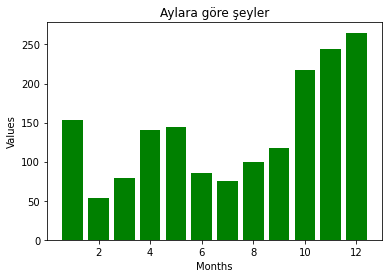

In [ ]:
# Your Code
newDict = {}
data_to_delete = []
for i in range(12):
  newDict[i+1] = 0


for i in range(len(data)):
  if "X" == data[i][5]:
    month = int(data[i][6][5:7])
    newDict[month] += 1
    data_to_delete.append(i)

new_data = np.delete(data, data_to_delete, axis=0)

print(newDict)
print(data)

plt.bar(list(newDict.keys()), list(newDict.values()), color='green')
plt.xlabel("Months")
plt.ylabel("Values")
plt.title("Aylara göre şeyler")

plt.show()


## 40 Points - Q4: Features of Medium Articles

### 10 Points - Part A

In this question, we will examine the different features of the articles on Medium. In Q3, we deleted the removed articles to examine the data that is not missing. First, let's check the new shape of our dataset.

- Print the new number of rows and columns after dropping missing values.

Medium has reading times calculated automatically by the site's own method which you can find in data. Take a quick look at the basic statistical information of this feature. 

- Print the maximum, minimum and average reading time of articles

Example Output:
```
After cleaning, Number of rows: 35136, columns: 7
Maximum reading time: 131.0
Minimum reading time: 0.0
Average reading time: 5.041182832422587
```

In [ ]:
new_data[0]

In [ ]:
new_data[:,4]

In [ ]:
# Your Code
print("After cleaning, Number of rows: {}, columns: {}".format(len(new_data), len(new_data[0])))
reading_time = []
findNumRule = re.compile(r"\d+")
for i in range(len(new_data)):
  minutes = findNumRule.search(new_data[i][4])
  reading_time.append(float(minutes.group()))


print("Maximum reading time: {}".format(max(reading_time)))
print("Minimum reading time: {}".format(min(reading_time)))
print("Average reading time: {}".format(sum(reading_time) / len(reading_time)))


After cleaning, Number of rows: 35136, columns: 7
Maximum reading time: 131.0
Minimum reading time: 0.0
Average reading time: 5.041182832422587


### 30 Points - Part B: Conditional Probability

Claps and Responses show how many interaction an article get similar to likes and comments. We can find out which tag is likely to receive more interaction.

$\DeclareMathOperator*{\argmax}{argmax} \argmax\limits_{\small{tag} \, \in \, \text{Tag Category}}\;P(\text{Interaction}=\text{1}|\text{Tag Category}=\text{tag})$

- Add new column to data which shows '**interaction**' and its value is 1 if there is any interaction, otherwise 0.
- For each tag category, calculate the conditional probability shown in the equation below.
- Report the tag category that returns the highest conditional probability. 
- Print the tag category and its probability value.

**Example Output:**
```
Data Science - 0.8334993911214437
```

In [ ]:
# Your Code
interaction_column = np.array([])
del myDict["X"]
for i in range(len(new_data)):
  currTitle = new_data[i][5]
  reaction = new_data[i][2] + new_data[i][3]
  if 0 == float(new_data[i][2]) and 0 == float(new_data[i][3]):
    interaction_column = np.append(interaction_column, 0)
  else:
    interaction_column = np.append(interaction_column, 1)
    if 1 == len(myDict[currTitle]):
      myDict[currTitle] = np.append( myDict[currTitle], 1 )
    elif 0 != reaction:
      myDict[currTitle][1] += 1
  
interaction_column = interaction_column.reshape(len(interaction_column), -1)
new_data = np.append(new_data, interaction_column, axis=1)


for i in list(myDict.keys()):
  title = i
  probability = myDict[i][1] / myDict[i][0]
  print(title, " "*(23-len(title)), "- ", probability)

Data Science             -  0.8334993911214436
Machine Learning         -  0.7955250905328505
Artificial Inteligence   -  0.6514830508474576
Data                     -  0.5031185031185031
Deep Learning            -  0.8219083706510506
Big Data                 -  0.578214059531349
Analytics                -  0.5795677799607073


In [ ]:
myDict

In [ ]:
interaction_column

In [ ]:
new_data